In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer


In [162]:
data = pd.read_excel("files/Dataset_ecommerce.xlsx")

In [163]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   InvoiceDate  541909 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    541909 non-null  object        
 4   Description  541909 non-null  object        
 5   Quantity     541909 non-null  int64         
 6   UnitPrice    541909 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [165]:
data.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [166]:
data.dropna(inplace = True)

In [167]:
data.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [168]:
data.duplicated().sum()

np.int64(0)

In [169]:
num_col = [column for column in data.columns if data[column].dtypes != "O"]
cat_col= [column for column in data.columns if data[column].dtypes == "O"]


print(f"Numerical Columns are: {num_col}")
print(f"Categorical Columns are: {cat_col}")

Numerical Columns are: ['InvoiceDate', 'CustomerID', 'Quantity', 'UnitPrice']
Categorical Columns are: ['InvoiceNo', 'StockCode', 'Description', 'Country']


In [170]:
i = 1
for col in data.columns:
    print(f"{i}. {col} Column has {data[col].nunique()} unique values")
    print(10*"--")
    i += 1

1. InvoiceNo Column has 22190 unique values
--------------------
2. InvoiceDate Column has 20460 unique values
--------------------
3. CustomerID Column has 4372 unique values
--------------------
4. StockCode Column has 9000 unique values
--------------------
5. Description Column has 10 unique values
--------------------
6. Quantity Column has 100 unique values
--------------------
7. UnitPrice Column has 9901 unique values
--------------------
8. Country Column has 28 unique values
--------------------


In [171]:
data[data["InvoiceNo"].astype(str).str.startswith("C")]

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
141,C536379,2010-12-01 09:41:00,14527.0,SC1351,Toys,35,38.86,Zambia
154,C536383,2010-12-01 09:49:00,15311.0,SC8496,Books,66,22.22,Zambia
235,C536391,2010-12-01 10:24:00,17548.0,SC6021,Kitchenware,21,35.02,Tunisia
236,C536391,2010-12-01 10:24:00,17548.0,SC9222,Jewelry,19,36.33,Morocco
237,C536391,2010-12-01 10:24:00,17548.0,SC5519,Electronics,40,42.14,Libya
...,...,...,...,...,...,...,...,...
540449,C581490,2011-12-09 09:57:00,14397.0,SC1491,Electronics,80,3.27,Benin
541541,C581499,2011-12-09 10:28:00,15498.0,SC4464,Furniture,89,31.80,Libya
541715,C581568,2011-12-09 11:57:00,15311.0,SC8355,Books,31,7.54,Ethiopia
541716,C581569,2011-12-09 11:58:00,17315.0,SC7751,Sports Equipment,28,26.03,Benin


In [172]:
data["CustomerID"] = data["CustomerID"].astype("int64").astype(str)

In [173]:
data["InvoiceMonth"] = data["InvoiceDate"].dt.to_period("M")

In [174]:
data["Revenue"] = data["Quantity"] * data["UnitPrice"]

In [175]:
num_transactions = data["InvoiceNo"].nunique()
num_customers = data["CustomerID"].nunique()
num_products = data["StockCode"].nunique()

In [176]:
print(f"The number of Transactions are: {num_transactions}")
print(f"The number of Customers are: {num_customers}")
print(f"The number of Products are: {num_products}")


The number of Transactions are: 22190
The number of Customers are: 4372
The number of Products are: 9000


In [177]:
data[data["Quantity"] < 0]

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Revenue


In [178]:
data[data["UnitPrice"] < 0]


,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Revenue


In [179]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Revenue
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,2010-12,664.95
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,2010-12,1862.95
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,2010-12,4796.22
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,2010-12,370.95
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,2010-12,1941.50


In [180]:
date_range = (data["InvoiceDate"].max(), data["InvoiceDate"].min())
print(f"Transaction Period is {date_range[1]} - {date_range[0]}")

Transaction Period is 2010-12-01 08:26:00 - 2011-12-09 12:50:00


In [181]:
top_countries = data.groupby("Country")["CustomerID"].nunique().sort_values(ascending = False)
top_countries.head()

Country
Mozambique      3072
Benin           3054
Togo            3053
Nigeria         3051
Burkina Faso    3049
Name: CustomerID, dtype: int64

/var/folders/ft/2zwfql7s71b3l_6vlgqhyhvr0000gn/T/ipykernel_5382/1747966694.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = top_countries.index, x = top_countries.values, palette = "viridis")


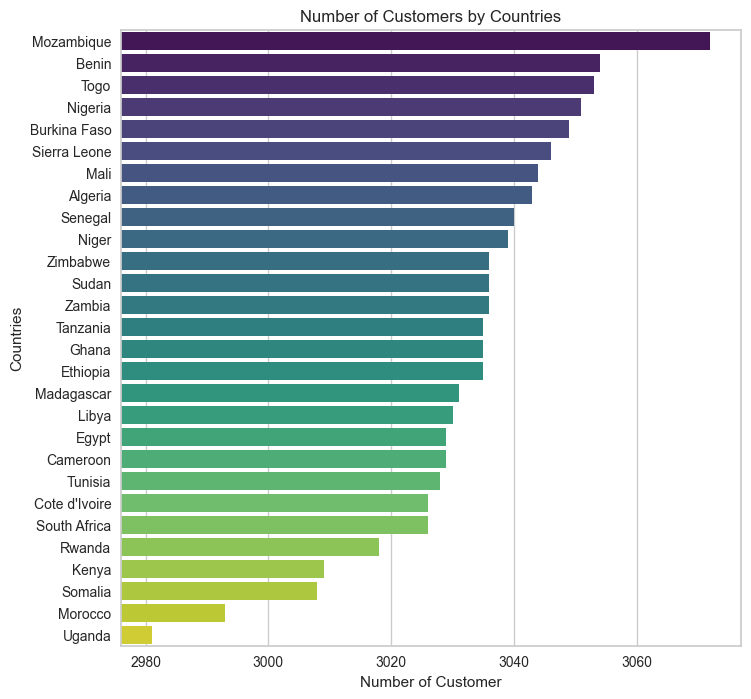

In [182]:
plt.figure(figsize = (8, 8))
plt.xlim(min(top_countries.values) - 5, max(top_countries.values) + 5)
sns.barplot(y = top_countries.index, x = top_countries.values, palette = "viridis")
plt.title("Number of Customers by Countries")
plt.ylabel("Countries")
plt.xlabel("Number of Customer")
plt.show()


In [183]:
monthly_sales = data.groupby("InvoiceMonth")["Revenue"].sum()
monthly_sales

InvoiceMonth
2010-12    6.792367e+07
2011-01    5.582933e+07
2011-02    5.208536e+07
2011-03    7.137210e+07
2011-04    5.914003e+07
2011-05    7.434151e+07
2011-06    7.109639e+07
2011-07    7.040789e+07
2011-08    6.994326e+07
2011-09    1.036281e+08
2011-10    1.287425e+08
2011-11    1.677331e+08
2011-12    4.519251e+07
Freq: M, Name: Revenue, dtype: float64

In [184]:
monthly_sales.index = monthly_sales.index.astype(str)

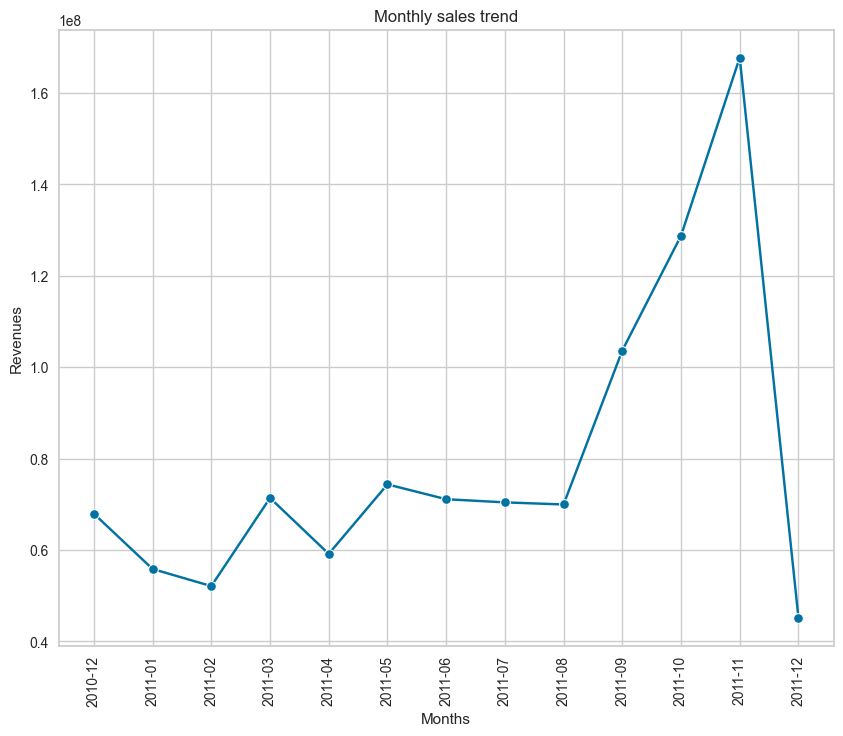

In [185]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = monthly_sales.index, y = monthly_sales.values, marker = "o", )
plt.title("Monthly sales trend")
plt.ylabel("Revenues")
plt.xlabel("Months")
plt.xticks(rotation = 90)
plt.show()


In [186]:
# cohort Analysis

In [187]:
first_purchase = data.groupby("CustomerID")["InvoiceMonth"].min().rename("CohortMonth")

In [188]:
data = data.join(first_purchase, on = "CustomerID")

In [189]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Revenue,CohortMonth
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,2010-12,664.95,2010-12
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,2010-12,1862.95,2010-12
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,2010-12,4796.22,2010-12
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,2010-12,370.95,2010-12
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,2010-12,1941.50,2010-12


In [190]:
invoice_year, invoice_month = data["InvoiceMonth"].dt.year, data["InvoiceMonth"].dt.month
cohort_year, cohort_month = data["CohortMonth"].dt.year, data["CohortMonth"].dt.month

In [191]:
cohort_index = ((invoice_year - cohort_year)* 12 + (invoice_month - cohort_month)) + 1

In [192]:
data["CohortIndex"] = cohort_index

In [193]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Revenue,CohortMonth,CohortIndex
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,2010-12,664.95,2010-12,1
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,2010-12,1862.95,2010-12,1
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,2010-12,4796.22,2010-12,1
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,2010-12,370.95,2010-12,1
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,2010-12,1941.50,2010-12,1


In [194]:
cohort_table = data.groupby(["CohortMonth", "CohortIndex"])["CustomerID"].nunique().reset_index()
cohort_table = cohort_table.pivot_table(index = "CohortMonth", columns = "CohortIndex", values = "CustomerID")
cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
cohort_size = cohort_table.iloc[:,0]
retention_table = cohort_table.divide(cohort_size, axis = 0).apply (lambda x: round(x*100, 1))

In [196]:
retention_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


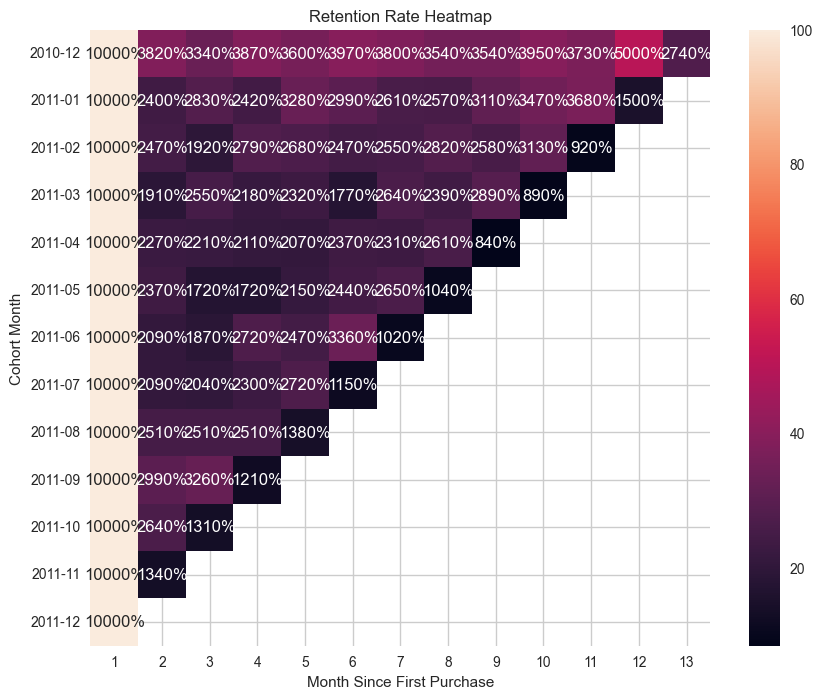

In [197]:
plt.figure(figsize = (10, 8))
sns.heatmap(retention_table, annot = True, fmt = ".0%")
plt.title("Retention Rate Heatmap")
plt.xlabel("Month Since First Purchase")
plt.ylabel("Cohort Month")
plt.show()

In [198]:
# Segmentation Analysis

In [199]:
reference_date = data["InvoiceDate"].max() + pd.Timedelta(days = 1)
reference_date

Timestamp('2011-12-10 12:50:00')

In [200]:
rfm = data.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (reference_date - x.max()).days,
    "InvoiceNo": lambda x: x.nunique(),
    "Revenue": lambda x: x.sum()
}).reset_index()

In [201]:
rfm.columns = ["CustomerID", "Recency(days)", "Frequency", "Monetary"]
rfm

,CustomerID,Recency(days),Frequency,Monetary
0,12346,326,2,5342.40
1,12347,2,7,431501.00
2,12348,75,4,82378.47
3,12349,19,1,176075.12
4,12350,310,1,48173.37
...,...,...,...,...
4367,18280,278,1,18907.36
4368,18281,181,1,26009.01
4369,18282,8,3,36010.74
4370,18283,4,16,2008747.62


In [202]:
segmentation_df = rfm.copy()

In [203]:
x = segmentation_df[["Recency(days)", "Frequency", "Monetary"]]
x

,Recency(days),Frequency,Monetary
0,326,2,5342.40
1,2,7,431501.00
2,75,4,82378.47
3,19,1,176075.12
4,310,1,48173.37
...,...,...,...
4367,278,1,18907.36
4368,181,1,26009.01
4369,8,3,36010.74
4370,4,16,2008747.62


In [204]:
sc = StandardScaler()

In [205]:
x_scaled = sc.fit_transform(x)
x_scaled

array([[ 2.32202285, -0.32936215, -0.39022789],
       [-0.89373323,  0.20610242,  0.32673724],
       [-0.1691956 , -0.11517632, -0.26062315],
       ...,
       [-0.83418219, -0.22226923, -0.33863177],
       [-0.87388289,  1.16993863,  2.98028181],
       [-0.48680114, -0.22226923, -0.04750002]], shape=(4372, 3))

In [206]:
inertia = []
score = []
k_range = range(3,11)
for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10)
    label = kmeans.fit_predict(x_scaled)
    inertia.append(kmeans.inertia_)
    sil = silhouette_score(x_scaled, label)
    score.append(sil)
    

<function matplotlib.pyplot.show(close=None, block=None)>

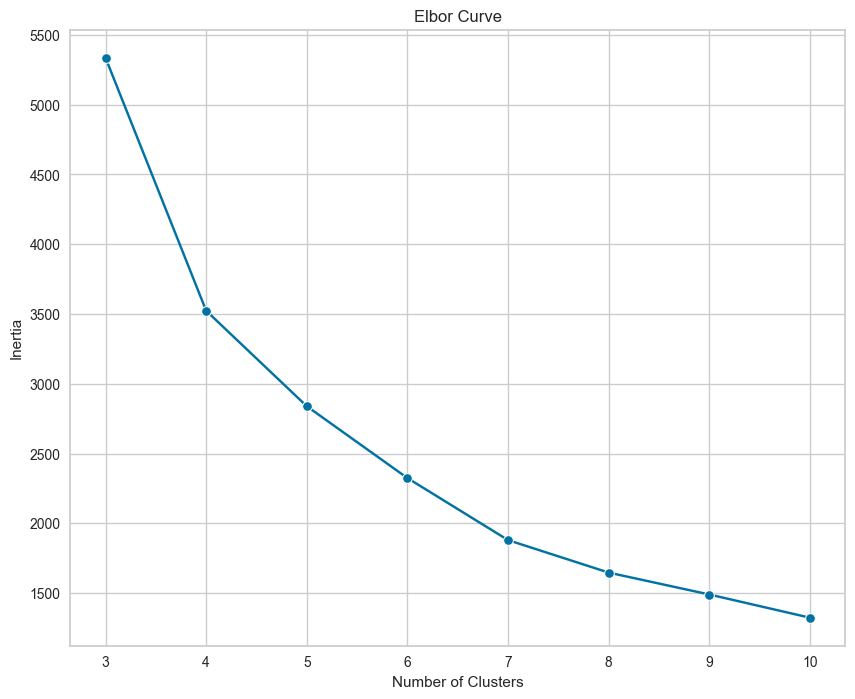

In [207]:
plt.figure(figsize = (10,8))
sns.lineplot(x = list(k_range), y = inertia, marker = "o")
plt.title("Elbor Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

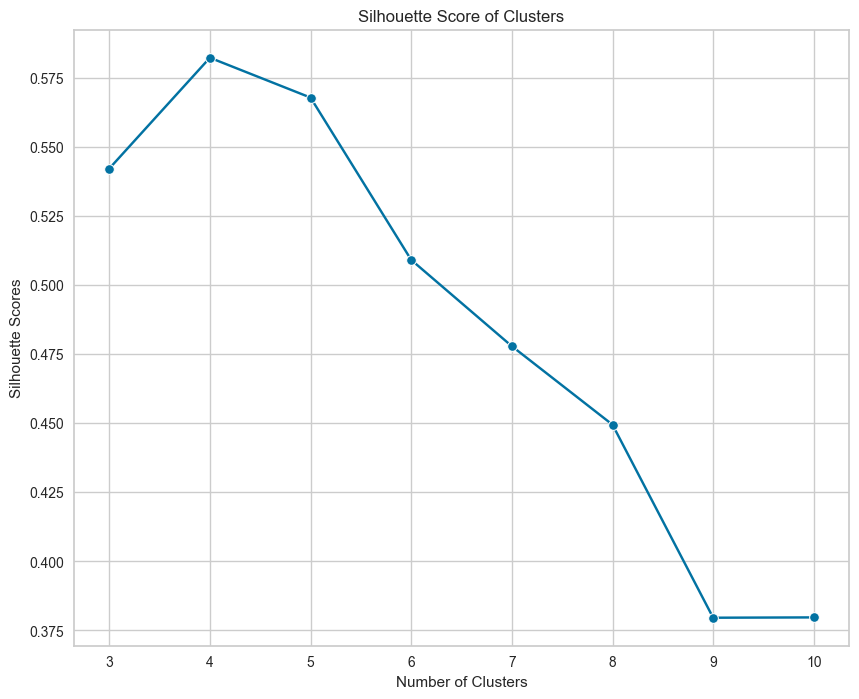

In [208]:
plt.figure(figsize = (10,8))
sns.lineplot(x = list(k_range), y = score, marker = "o")
plt.title("Silhouette Score of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Scores")
plt.show

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10, random_state=42),
                 k=range(3, 11))

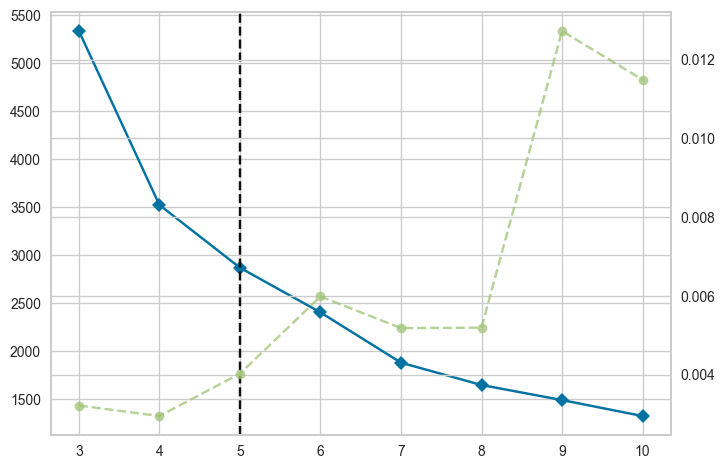

In [209]:
model = KMeans(random_state = 42)
v = KElbowVisualizer(model, k = k_range)
v.fit(x_scaled)

In [210]:
km = KMeans(n_clusters = 4, random_state = 42, n_init = 10)
labels = km.fit_predict(x_scaled)
segmentation_df["Cluster"] = labels

In [211]:
segmentation_df

,CustomerID,Recency(days),Frequency,Monetary,Cluster
0,12346,326,2,5342.40,1
1,12347,2,7,431501.00,0
2,12348,75,4,82378.47,0
3,12349,19,1,176075.12,0
4,12350,310,1,48173.37,1
...,...,...,...,...,...
4367,18280,278,1,18907.36,1
4368,18281,181,1,26009.01,1
4369,18282,8,3,36010.74,0
4370,18283,4,16,2008747.62,3


<function matplotlib.pyplot.show(close=None, block=None)>

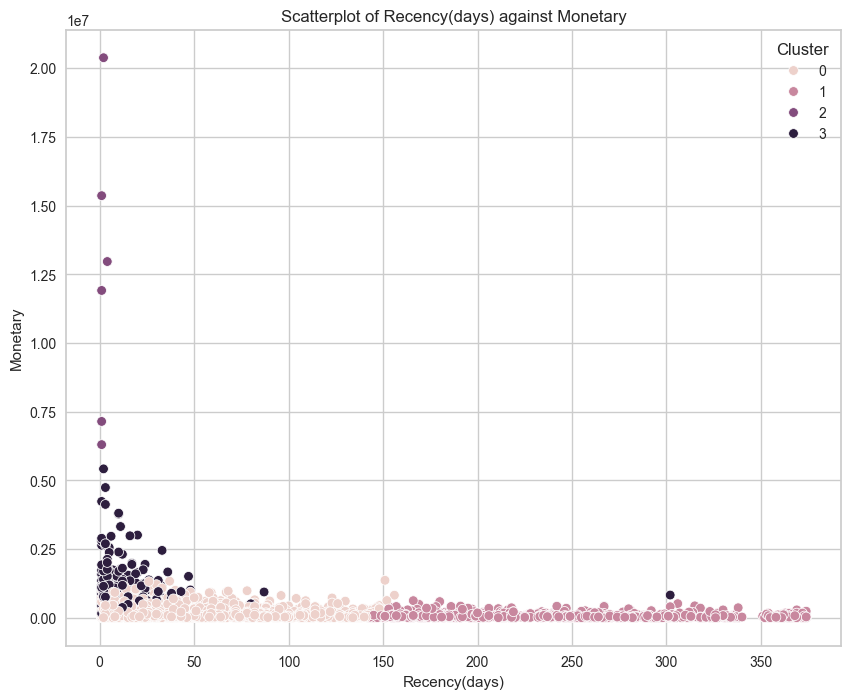

In [212]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = segmentation_df["Recency(days)"], y = segmentation_df["Monetary"], hue = segmentation_df["Cluster"])
plt.title("Scatterplot of Recency(days) against Monetary")
plt.xlabel("Recency(days)")
plt.ylabel("Monetary")
plt.show

In [213]:
segmentation_df

,CustomerID,Recency(days),Frequency,Monetary,Cluster
0,12346,326,2,5342.40,1
1,12347,2,7,431501.00,0
2,12348,75,4,82378.47,0
3,12349,19,1,176075.12,0
4,12350,310,1,48173.37,1
...,...,...,...,...,...
4367,18280,278,1,18907.36,1
4368,18281,181,1,26009.01,1
4369,18282,8,3,36010.74,0
4370,18283,4,16,2008747.62,3


In [214]:
cluster_df = segmentation_df.groupby("Cluster").agg({
    "CustomerID": lambda x: x.count(),
    "Recency(days)": lambda x: int(np.ceil(x.mean())),
    "Frequency": lambda x: int(np.ceil(x.mean())),
    "Monetary": lambda x: x.mean().round(1)
}).reset_index()

In [215]:
cluster_df.columns = ["Cluster", "No_Customers", "Recency(days)", "Frequency", "Monetary"]
cluster_df

,Cluster,No_Customers,Recency(days),Frequency,Monetary
0,0,3023,44,5,195421.0
1,1,1077,249,2,69191.6
2,2,6,2,154,12345024.6
3,3,266,12,26,1120633.6


In [216]:
cluster_df["Cluster"] = cluster_df["Cluster"].map({0: "Loyal Regulars", 1: "At Risk/ Lost", 2: "Ultra VIPs", 3: "Champions"})
cluster_df

,Cluster,No_Customers,Recency(days),Frequency,Monetary
0,Loyal Regulars,3023,44,5,195421.0
1,At Risk/ Lost,1077,249,2,69191.6
2,Ultra VIPs,6,2,154,12345024.6
3,Champions,266,12,26,1120633.6


In [223]:
df_plot = cluster_df.copy()
df_plot[["No_Customers", "Recency(days)", "Frequency", "Monetary"]] = df_plot[["No_Customers", "Recency(days)", "Frequency", "Monetary"]].apply(lambda x: x / x.max())
df_plot

,Cluster,No_Customers,Recency(days),Frequency,Monetary
0,Loyal Regulars,1.000000,0.176707,0.032468,0.015830
1,At Risk/ Lost,0.356269,1.000000,0.012987,0.005605
2,Ultra VIPs,0.001985,0.008032,1.000000,1.000000
3,Champions,0.087992,0.048193,0.168831,0.090776


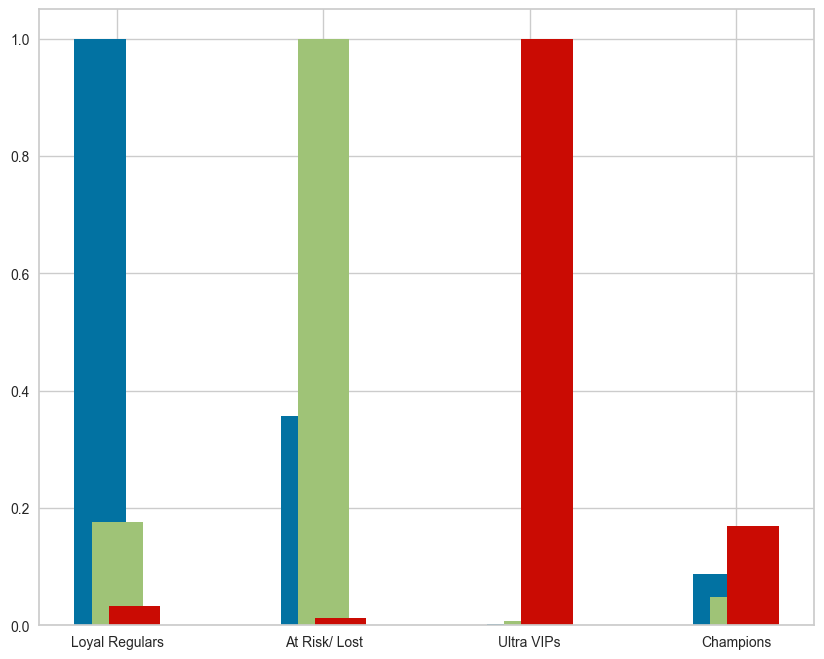

In [225]:
plt.figure(figsize = (10, 8))

x = np.arange(len(df_plot["Cluster"]))
width = 0.25

plt.bar(x - width/3, df_plot["No_Customers"], width, label = "No_Customers")
plt.bar(x, df_plot["Recency(days)"], width, label = "Recency (days)")
plt.bar(x + width/3, df_plot["Frequency"], width, label = "Frequency")

plt.xticks(x, cluster_df["Cluster"])
plt.show()

<Axes: >

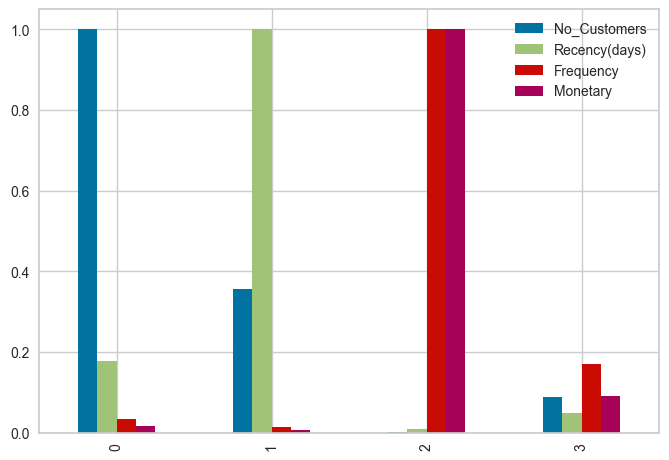

In [226]:
df_plot.plot(kind = "bar")